In [3]:
import time

def mandel(c,maxiter):
    
    z = complex(0,0)
    
    for iteration in xrange(maxiter):
        z = (z*z) + c
        
        if abs(z) > 2:
            break
        
    return iteration

def make_plot(xvalues,yvalues):
    
    xlen = len(xvalues)
    ylen = len(yvalues)
    
    mapa = np.zeros((xlen,ylen))
    
    for ix in xrange(xlen):
        for iy in xrange(ylen):
            
            cx = xvalues[ix]
            cy = yvalues[iy]
            
            c = complex(cx, cy)

            mapa[ix,iy] = mandel(c,120)            
    return mapa

start = time.time()
# set the location and size of the atlas rectangle
xvalues = np.linspace(-3, -2, 1000)
yvalues = np.linspace(-3, -2, 1000)

result = make_plot(xvalues,yvalues)

fig, ax = plt.subplots(figsize=(18, 18))

ax.imshow(result, interpolation="nearest")
print time.time() - start

1.32799983025


In [5]:
import time
import numpy as np
import matplotlib.pyplot as plt

def interval(xi, xf, xsize, yi, yf, ysize):
    xvalues = np.linspace(xi, xf, xsize)
    yvalues = np.linspace(yi, yf, ysize)
    return xvalues, yvalues

xvalues, yvalues = interval(-0.3,0.3,1000,-0.3,0.3,1000)
result = make_plot(xvalues, yvalues)

fig, ax = plt.subplots(figsize=(18, 18))

ax.imshow(result, interpolation="nearest")

In [ ]:
def zoom_mandel(x0, y0, zoom):
    xvalues, yvalues = interval(x0-1.5/zoom,x0+1.5/zoom,1000,y0-1.5/zoom,y0+1.5/zoom,1000)
    result = make_plot(xvalues, yvalues)

    fig, ax = plt.subplots(figsize=(18, 18))

    ax.imshow(result, interpolation="nearest")

zoom_mandel(-1.48,0,100)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def mandelbrot(rlim, ilim, n=100, d=100):
    r, i = np.meshgrid(np.linspace(rlim[0], rlim[1]), np.linspace(ilim[0], ilim[1]))
    c = r + i*1j
    z = np.copy(c)
    fractal = np.ones_like(z, dtype=np.uint8)*255
    for j in range(n):
        mask = abs(z) <= 10
        z[mask] *= z[mask]
        z[mask] += c[mask]
        fractal[(fractal == 255) & ~mask] = 254*j/n
    return fractal

8.20799994469


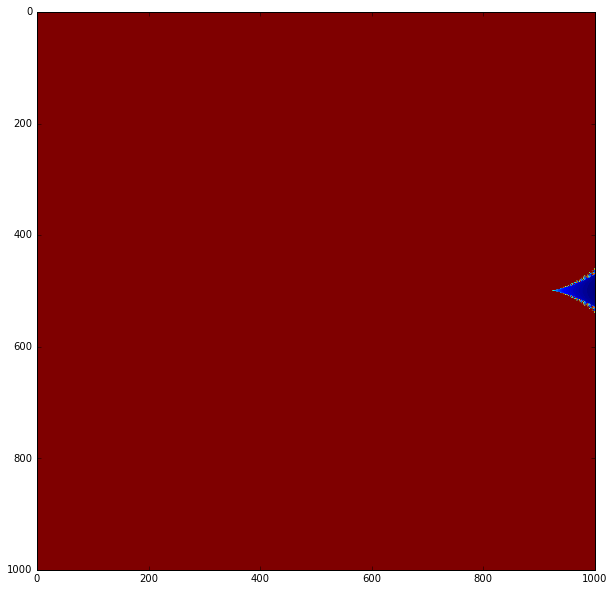

In [1]:
%matplotlib inline

start = time.time()

def mandelbrot(rlim, ilim, n=100, d=1000):
    r, i = np.meshgrid(np.linspace(rlim[0], rlim[1],d), np.linspace(ilim[0], ilim[1],d))
    c = r + i*1j
    z = np.copy(c)
    fractal = np.ones_like(z, dtype=np.uint8)*255
    for j in range(n):
        mask = abs(z) <= 10
        z[mask] *= z[mask]
        z[mask] += c[mask]
        fractal[(fractal == 255) & ~mask] = 254*j/n
    return fractal

plt.figure(figsize=(10,10))
plt.imshow(mandelbrot((-0.3,0.3),(-0.3,0.3),d=1000))
print time.time() - start


(-2.0, 1.0) (-1.5, 1.5)
(-1.9738461538461538, 0.3338461538461537) (-1.1538461538461537, 1.1538461538461537)
(-2.0275739644970416, -0.25242603550295883) (-0.8875739644970413, 0.8875739644970413)
(-2.142749203459263, -0.7772507965407376) (-0.6827492034592626, 0.6827492034592626)
(-2.3051916949686637, -1.2548083050313366) (-0.5251916949686635, 0.5251916949686635)
(-2.503993611514357, -1.6960063884856436) (-0.40399361151435653, 0.40399361151435653)
(-2.7307643165495055, -2.1092356834504953) (-0.31076431654950504, 0.31076431654950504)
(-2.9790494742688503, -2.50095052573115) (-0.23904947426885, 0.23904947426885)
(-3.2438842109760384, -2.8761157890239617) (-0.18388421097603844, 0.18388421097603844)
(-3.521449393058491, -3.2385506069415086) (-0.1414493930584911, 0.1414493930584911)


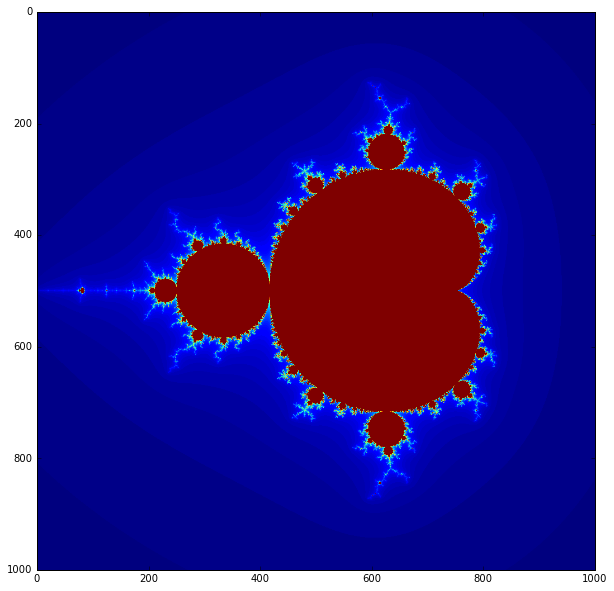

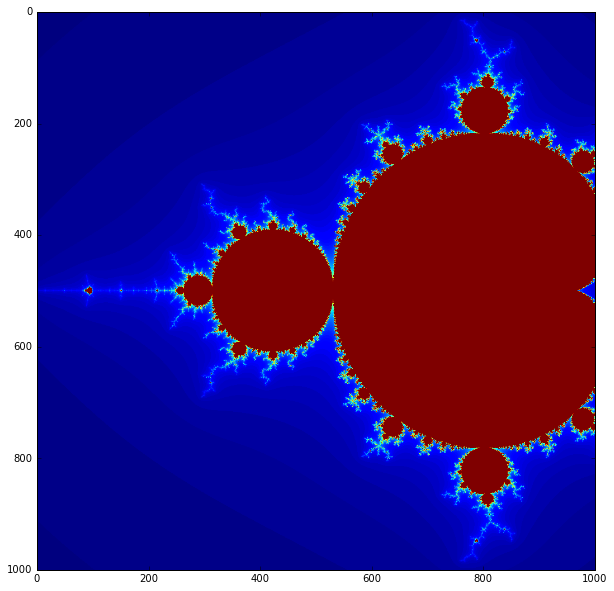

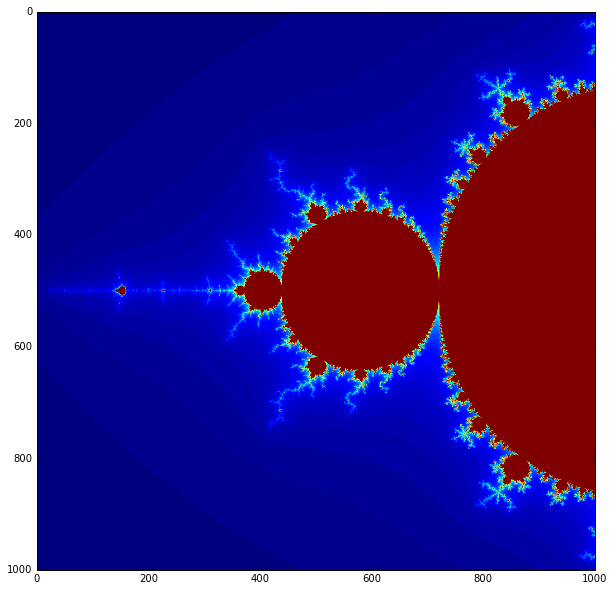

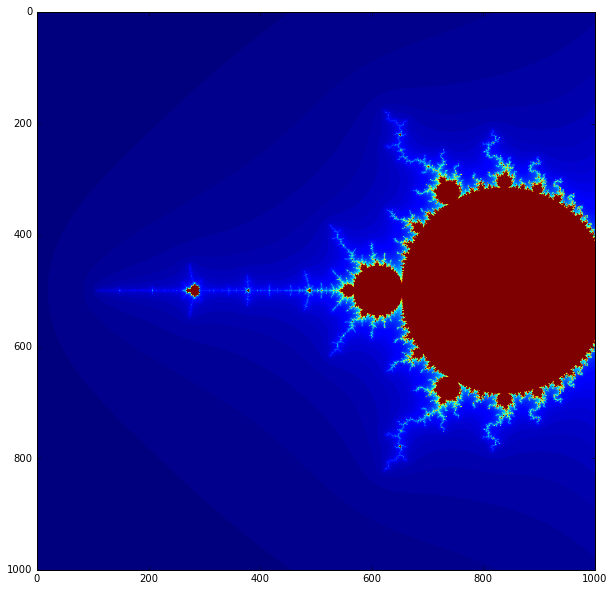

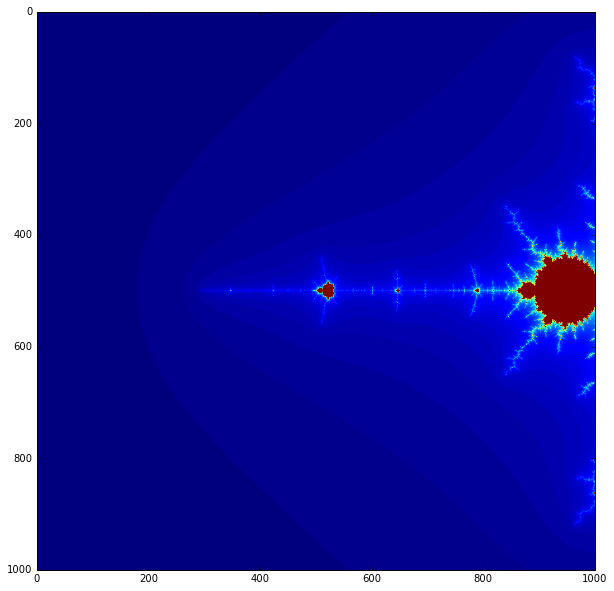

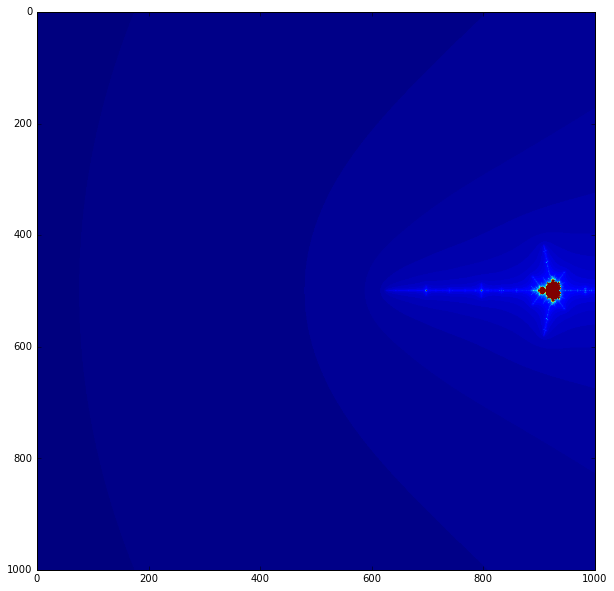

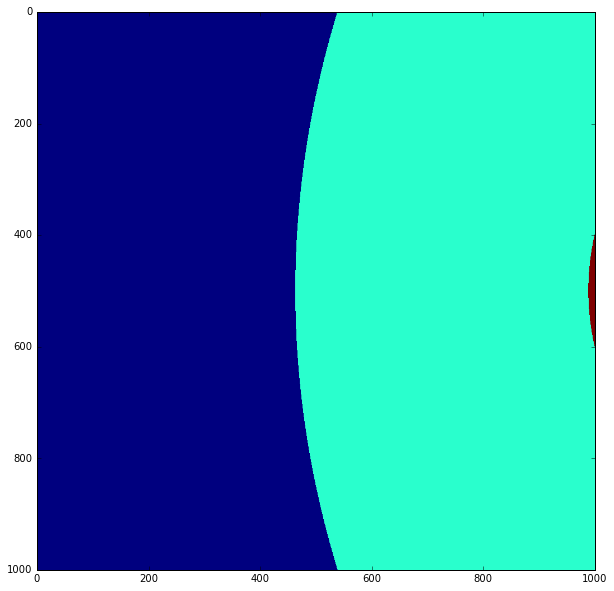

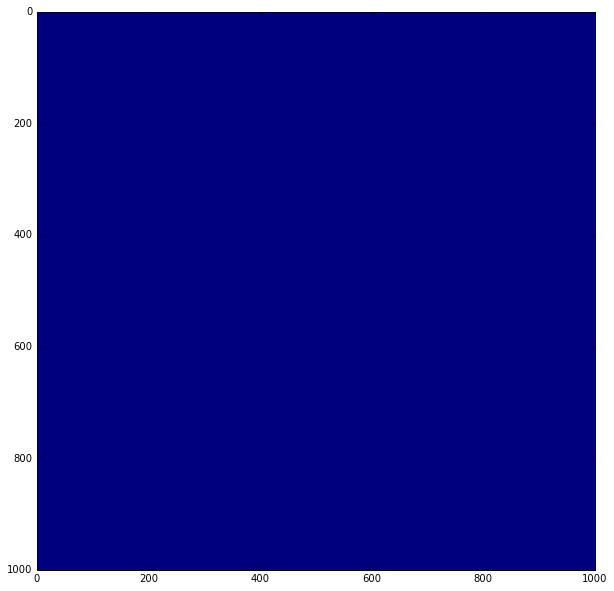

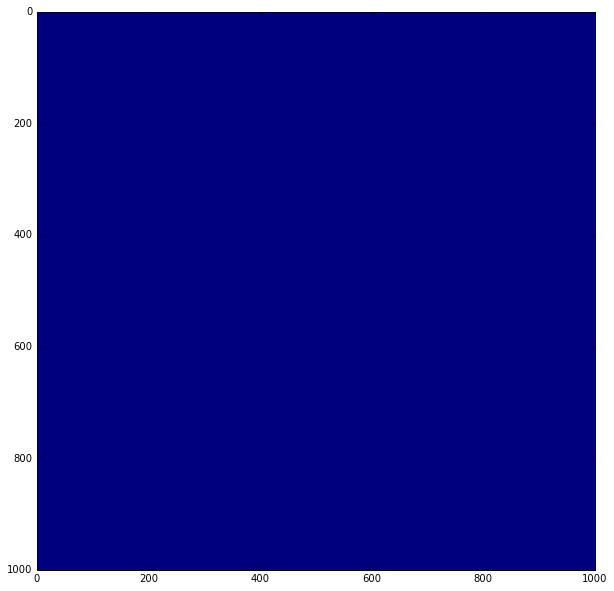

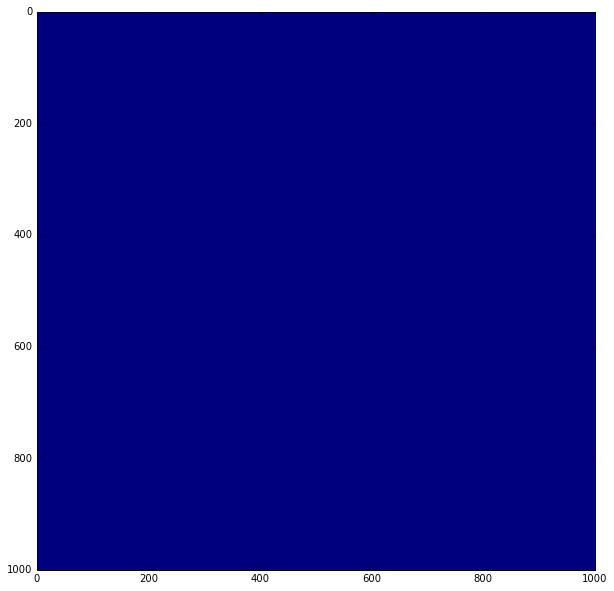

In [7]:
def show_mandel(x1,y1,x2,y2,size_1,zoom,N):
    for i in range(N):
        x_c = x1 + i*(x2 - x1)/N
        y_c = y1 + i*(y2 - y1)/N
        #plt.clf()
        plt.figure(figsize=(10,10))
        plt.imshow(mandelbrot((x_c - size_1/zoom**i,x_c + size_1/zoom**i),(y_c - size_1/zoom**i,y_c + size_1/zoom**i)));

        

show_mandel(-0.5,0,-3.7,0,1.5,1.3,10)


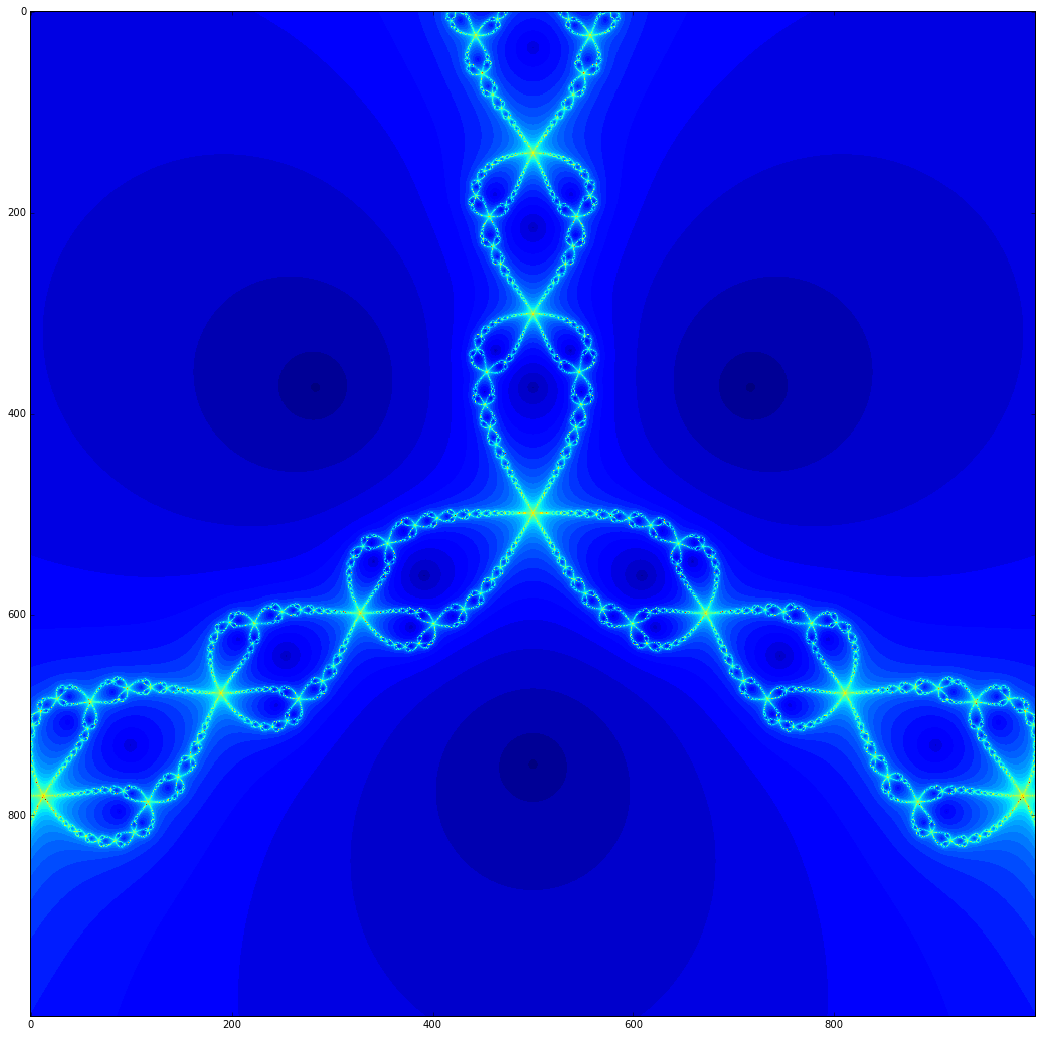

In [2]:
def p(z):
    return z**3-1

def dp(z):
    return 3*z**2


def Newton_Raphson2(p_in_re, p_in_im, MAX_ITER):
    n = 0
    x_n = complex(p_in_re, p_in_im)
    # Precission limit
    h = 0.001 
    
    while ( n < MAX_ITER and abs(p(x_n)) > h):
        x_n = x_n - p(x_n)/dp(x_n)
        n += 1
    return x_n,n

def make_plot(xvalues,yvalues):
    
    xlen = len(xvalues)
    ylen = len(yvalues)
    
    mapa = np.zeros((xlen,ylen))
    
    for ix in xrange(xlen):
        for iy in xrange(ylen):
            
            cx = xvalues[ix]
            cy = yvalues[iy]
            
            odhad, iterace = Newton_Raphson2(cx,cy,100)

            mapa[ix,iy] = iterace           
    return mapa

# set the location and size of the atlas rectangle
xvalues = np.linspace(-2, 2, 1000)
yvalues = np.linspace(-2, 2, 1000)

result = make_plot(xvalues,yvalues)

fig, ax = plt.subplots(figsize=(18, 18))

ax.imshow(result, interpolation="nearest")